In [1]:
letters = ['a','b','c','d', 'e', 'f', 'g', 'h', 'i', 'j']
data_path_1 = ['data/e3' + l + 't.csv' for l in letters]
data_path_1

['data/e3at.csv',
 'data/e3bt.csv',
 'data/e3ct.csv',
 'data/e3dt.csv',
 'data/e3et.csv',
 'data/e3ft.csv',
 'data/e3gt.csv',
 'data/e3ht.csv',
 'data/e3it.csv',
 'data/e3jt.csv']

In [2]:
import neural_network as nn
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Using TensorFlow backend.
W0717 10:08:30.208803 140001849263744 __init__.py:308] Limited tf.compat.v2.summary API due to missing TensorBoard installation.


Populating the interactive namespace from numpy and matplotlib


In [3]:
dfs = [nn.load_nl_data({'data_path':path}) for path in data_path_1]

In [4]:
dfs = [df[df['time'] >= 489] for df in dfs]

In [5]:
dfs = [df.drop(columns=['old_pos', 'electors_state', 'votes_state', 'next_move', 'previous_votes', 'seats', 'previous_seats']) for df in dfs]

In [6]:
dfs = [pd.concat([df, pd.DataFrame(df['pos'].values.tolist(), columns = ['pos_x', 'pos_y'], index=df.index)], axis = 1) for df in dfs]

In [7]:
for i in range(len(letters)):
    dfs[i]['run'] = i

In [8]:
df = pd.concat(dfs)

In [9]:
df.describe()

,time,agent,votes,pos_x,pos_y,run
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,494.000000,1151.500000,180.793182,-0.121617,0.202631,4.500000
std,3.162997,5.767592,50.021473,2.217587,6.767687,2.872934
min,489.000000,1142.000000,27.000000,-7.968253,-10.412628,0.000000
25%,491.000000,1146.750000,158.000000,-0.874043,-6.155651,2.000000
50%,494.000000,1151.500000,175.000000,-0.077612,1.980321,4.500000
75%,497.000000,1156.250000,198.000000,0.534883,6.241701,7.000000
max,499.000000,1161.000000,330.000000,10.430581,10.387082,9.000000


In [10]:
df[df['time'] == 499].describe()

,time,agent,votes,pos_x,pos_y,run
count,200.0,200.000000,200.000000,200.000000,200.000000,200.000000
mean,499.0,1151.500000,180.310000,-0.089117,0.190131,4.500000
std,0.0,5.780751,50.322616,2.229895,6.812240,2.879489
min,499.0,1142.000000,29.000000,-7.469940,-10.412628,0.000000
25%,499.0,1146.750000,155.500000,-0.732350,-6.149330,2.000000
50%,499.0,1151.500000,174.000000,-0.054548,1.980321,4.500000
75%,499.0,1156.250000,193.500000,0.545061,6.224439,7.000000
max,499.0,1161.000000,325.000000,10.430581,10.387082,9.000000


In [11]:
df = df[df['time'] == 499]

In [12]:
df = df.drop(columns=['time','pos', 'agent'])

In [13]:
df['abs_x'] = abs(df['pos_x'])
df['abs_y'] = abs(df['pos_y'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5479726128>],
      dtype=object)

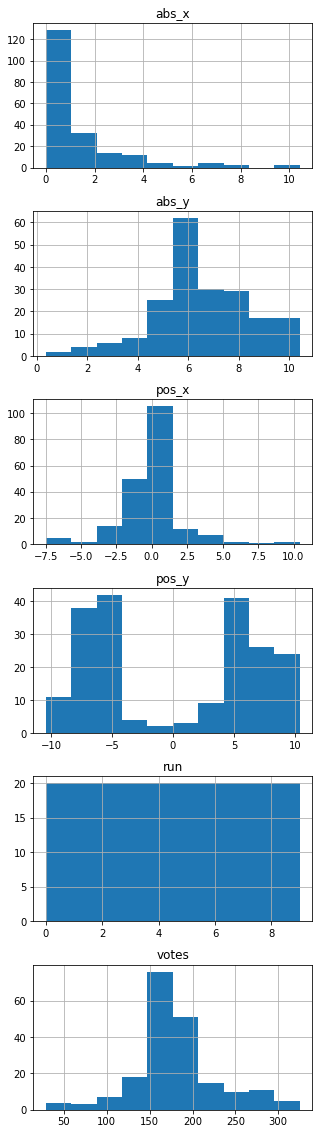

In [14]:
df.hist(layout=(6,1), figsize=(5,20))

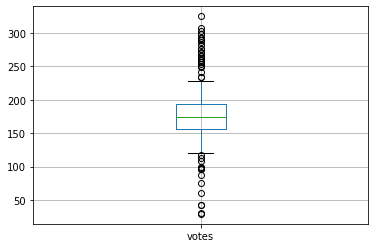

In [15]:
df.boxplot(column=['votes'], whis=1)

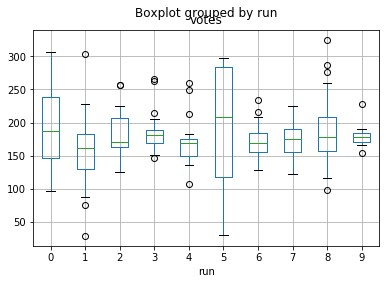

In [16]:
df.boxplot(column=['votes'], whis=1, by='run')

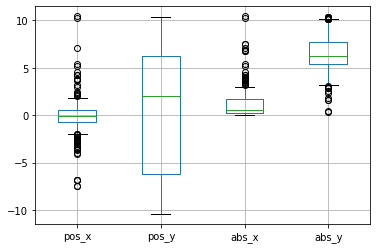

In [17]:
df.boxplot(column=['pos_x','pos_y', 'abs_x','abs_y'], whis=1)

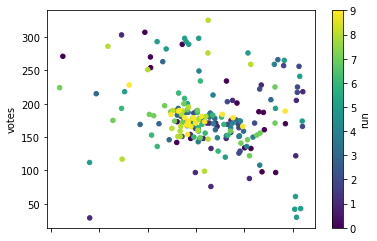

In [18]:
df.plot.scatter(x='abs_y', y='votes', c='run', colormap='viridis')

In [19]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [20]:
linreg = ols('votes ~ C(run)', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.038
Date:                Wed, 17 Jul 2019   Prob (F-statistic):              0.411
Time:                        10:09:13   Log-Likelihood:                -1062.2
No. Observations:                 200   AIC:                             2144.
Df Residuals:                     190   BIC:                             2177.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     191.8000     11.243     17.060      0.000     169.623     213.977
C(run)[T.1]   -33.5500     15.900     -2.110      0.036     -64.913      -2.187
C(run)[T.2]    -9.1000     15.900     -0.572      0.568     -40.463      22.263
C(run)[T.3]    -4.8500     15.900     -0.305      0.761     -36.213      26.513
C(run)[T.4]   -21.3000     15.900     -1.340      0.182     -52.663      10.063
C(run)[T.5]     3.1000     15.900      0.195      0.846     -28.263      34.463
C(run)[T.6]   -18.7500     15.900     -1.179      0.240     -50.113      12.613
C(run)[T.7]   -16.8500     15.900     -1.060      0.291     -48.213      14.513
C(run)[T.8]    -0.5500     15.900     -0.035      0.972     -31.913      30.813
C(run)[T.9]   -13.0500     15.900     -0.821      0.413     -44.413      18.313
==============================================================================
Omnibus:                        9.227   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               18.688
Skew:                          -0.047   Prob(JB):                     8.75e-05
Kurtosis:                       4.495   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
aov_table = sm.stats.anova_lm(linreg)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(run),9.0,23622.48,2624.720000,1.038263,0.411088
Residual,190.0,480318.30,2527.991053,NaN,NaN


In [22]:
linreg = ols('abs_x ~ C(run)', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  abs_x   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.166
Method:                 Least Squares   F-statistic:                     5.404
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           1.36e-06
Time:                        10:09:13   Log-Likelihood:                -377.33
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     190   BIC:                             807.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.8576      0.366      2.342      0.020       0.135       1.580
C(run)[T.1]     2.2083      0.518      4.264      0.000       1.187       3.230
C(run)[T.2]     0.3889      0.518      0.751      0.454      -0.633       1.411
C(run)[T.3]     0.1403      0.518      0.271      0.787      -0.881       1.162
C(run)[T.4]     0.1784      0.518      0.345      0.731      -0.843       1.200
C(run)[T.5]     1.7913      0.518      3.459      0.001       0.770       2.813
C(run)[T.6]     0.1612      0.518      0.311      0.756      -0.860       1.183
C(run)[T.7]     0.2606      0.518      0.503      0.615      -0.761       1.282
C(run)[T.8]     0.1013      0.518      0.196      0.845      -0.920       1.123
C(run)[T.9]    -0.5591      0.518     -1.079      0.282      -1.581       0.463
==============================================================================
Omnibus:                       83.547   Durbin-Watson:                   1.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.773
Skew:                           1.767   Prob(JB):                     2.37e-57
Kurtosis:                       7.336   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
aov_table = sm.stats.anova_lm(linreg)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(run),9.0,130.452882,14.494765,5.40373,0.000001
Residual,190.0,509.648969,2.682363,NaN,NaN


In [24]:
linreg = ols('pos_x ~ C(run)', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  pos_x   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.148
Date:                Wed, 17 Jul 2019   Prob (F-statistic):              0.331
Time:                        10:09:13   Log-Likelihood:                -438.38
No. Observations:                 200   AIC:                             896.8
Df Residuals:                     190   BIC:                             929.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.1762      0.497      0.354      0.723      -0.804       1.156
C(run)[T.1]     0.4369      0.703      0.622      0.535      -0.949       1.823
C(run)[T.2]    -0.2434      0.703     -0.346      0.729      -1.630       1.143
C(run)[T.3]     0.3217      0.703      0.458      0.648      -1.065       1.708
C(run)[T.4]    -0.0731      0.703     -0.104      0.917      -1.459       1.313
C(run)[T.5]    -1.2696      0.703     -1.806      0.072      -2.656       0.117
C(run)[T.6]    -0.6003      0.703     -0.854      0.394      -1.987       0.786
C(run)[T.7]    -0.0355      0.703     -0.050      0.960      -1.422       1.351
C(run)[T.8]    -0.9234      0.703     -1.314      0.190      -2.310       0.463
C(run)[T.9]    -0.2663      0.703     -0.379      0.705      -1.653       1.120
==============================================================================
Omnibus:                       40.180   Durbin-Watson:                   1.476
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.449
Skew:                           0.588   Prob(JB):                     7.37e-47
Kurtosis:                       7.910   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
aov_table = sm.stats.anova_lm(linreg)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(run),9.0,51.044320,5.671591,1.148254,0.330884
Residual,190.0,938.469927,4.939315,NaN,NaN


In [26]:
mlr = linreg = ols('votes ~ C(run) + pos_x + pos_y', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.080
Date:                Wed, 17 Jul 2019   Prob (F-statistic):              0.380
Time:                        10:09:14   Log-Likelihood:                -1060.9
No. Observations:                 200   AIC:                             2146.
Df Residuals:                     188   BIC:                             2185.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     192.4630     11.348     16.960      0.000     170.077     214.849
C(run)[T.1]   -34.7329     15.896     -2.185      0.030     -66.091      -3.375
C(run)[T.2]    -8.9630     15.897     -0.564      0.574     -40.322      22.397
C(run)[T.3]    -5.7244     15.888     -0.360      0.719     -37.066      25.618
C(run)[T.4]   -24.0076     16.460     -1.459      0.146     -56.478       8.462
C(run)[T.5]     6.6565     16.037      0.415      0.679     -24.979      38.292
C(run)[T.6]   -19.1371     16.138     -1.186      0.237     -50.973      12.698
C(run)[T.7]   -17.7400     15.946     -1.113      0.267     -49.196      13.716
C(run)[T.8]     0.3278     16.070      0.020      0.984     -31.372      32.028
C(run)[T.9]   -15.3850     16.498     -0.933      0.352     -47.931      17.161
pos_x           2.3446      1.639      1.430      0.154      -0.889       5.578
pos_y          -0.3866      0.582     -0.664      0.507      -1.535       0.761
==============================================================================
Omnibus:                        7.655   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.022   Jarque-Bera (JB):               13.827
Skew:                           0.009   Prob(JB):                     0.000994
Kurtosis:                       4.288   Cond. No.                         71.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
mlr = linreg = ols('votes ~ C(run) + abs_x + abs_y', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     3.143
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           0.000638
Time:                        10:09:14   Log-Likelihood:                -1050.1
No. Observations:                 200   AIC:                             2124.
Df Residuals:                     188   BIC:                             2164.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     233.1187     16.203     14.387      0.000     201.156     265.081
C(run)[T.1]   -12.6385     15.769     -0.801      0.424     -43.746      18.469
C(run)[T.2]     0.7901     15.250      0.052      0.959     -29.293      30.873
C(run)[T.3]    -6.2902     15.079     -0.417      0.677     -36.036      23.456
C(run)[T.4]   -17.0349     15.083     -1.129      0.260     -46.789      12.720
C(run)[T.5]    21.6173     15.558      1.389      0.166      -9.074      52.308
C(run)[T.6]   -20.6600     15.096     -1.369      0.173     -50.439       9.119
C(run)[T.7]   -16.8907     15.078     -1.120      0.264     -46.635      12.854
C(run)[T.8]    -5.1257     15.172     -0.338      0.736     -35.055      24.803
C(run)[T.9]   -20.2855     15.119     -1.342      0.181     -50.110       9.539
abs_x          -8.3999      2.108     -3.985      0.000     -12.558      -4.242
abs_y          -5.2229      1.854     -2.817      0.005      -8.881      -1.565
==============================================================================
Omnibus:                        5.529   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                5.181
Skew:                           0.340   Prob(JB):                       0.0750
Kurtosis:                       3.398   Cond. No.                         73.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
df['abs_y_t'] = abs (df['abs_y'] - 3.8)

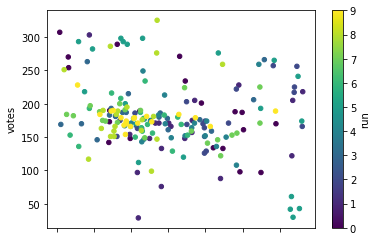

In [29]:
df.plot.scatter(x='abs_y_t', y='votes', c='run', colormap='viridis')

In [30]:
mlr = linreg = ols('votes ~ C(run) + abs_x + abs_y_t', data=df).fit()
linreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     2.873
Date:                Wed, 17 Jul 2019   Prob (F-statistic):            0.00164
Time:                        10:09:14   Log-Likelihood:                -1051.4
No. Observations:                 200   AIC:                             2127.
Df Residuals:                     188   BIC:                             2166.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     214.7001     12.803     16.769      0.000     189.443     239.957
C(run)[T.1]   -14.3228     15.858     -0.903      0.368     -45.605      16.960
C(run)[T.2]    -1.1193     15.306     -0.073      0.942     -31.313      29.074
C(run)[T.3]    -7.1198     15.226     -0.468      0.641     -37.155      22.915
C(run)[T.4]   -18.8698     15.158     -1.245      0.215     -48.772      11.033
C(run)[T.5]    20.1938     15.640      1.291      0.198     -10.658      51.046
C(run)[T.6]   -22.1370     15.292     -1.448      0.149     -52.303       8.029
C(run)[T.7]   -16.3972     15.178     -1.080      0.281     -46.338      13.543
C(run)[T.8]    -5.8456     15.383     -0.380      0.704     -36.191      24.500
C(run)[T.9]   -21.3913     15.275     -1.400      0.163     -51.523       8.741
abs_x          -7.6707      2.151     -3.566      0.000     -11.914      -3.427
abs_y_t        -5.3299      2.311     -2.306      0.022      -9.888      -0.771
==============================================================================
Omnibus:                        5.884   Durbin-Watson:                   1.633
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                5.514
Skew:                           0.375   Prob(JB):                       0.0635
Kurtosis:                       3.315   Cond. No.                         40.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
mlr = ols('votes ~ abs_x + abs_y', data=df).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  votes   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     10.79
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           3.57e-05
Time:                        10:09:15   Log-Likelihood:                -1056.6
No. Observations:                 200   AIC:                             2119.
Df Residuals:                     197   BIC:                             2129.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    217.8602     11.994     18.164      0.000     194.207     241.513
abs_x         -7.0496      1.906     -3.699      0.000     -10.808      -3.291
abs_y         -4.3299      1.758     -2.463      0.015      -7.797      -0.863
==============================================================================
Omnibus:                       17.112   Durbin-Watson:                   1.566
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.109
Skew:                           0.747   Prob(JB):                     7.09e-05
Kurtosis:                       3.243   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
data_path_random_1 = ['data/e2' + l + 'r.csv' for l in letters]

In [33]:
dfsr = [nn.load_nl_data({'data_path':path}) for path in data_path_random_1]
dfsr = pd.concat(dfsr)
dfsr = pd.concat([dfsr, pd.DataFrame(dfsr['pos'].values.tolist(), columns = ['pos_x', 'pos_y'], index=dfsr.index)], axis = 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f547b5233c8>],
      dtype=object)

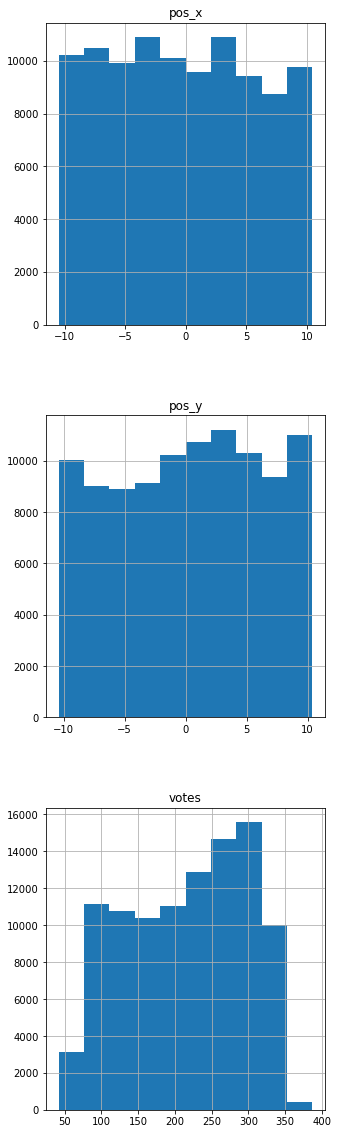

In [34]:
dfsr.hist(column=['votes', 'pos_x', 'pos_y'], layout=(3,1), figsize=(5,20))

In [35]:
dfs = [df[df['time'] == 499] for df in dfs]

In [36]:
for df in dfs:
    df['inrun'] = df.index // 100

In [37]:
df2 = pd.concat(dfs)

In [38]:
df2 = df2.groupby(['inrun', 'run'])

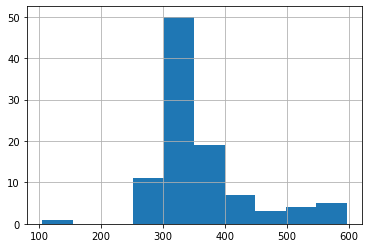

In [39]:
df2.votes.sum().hist()

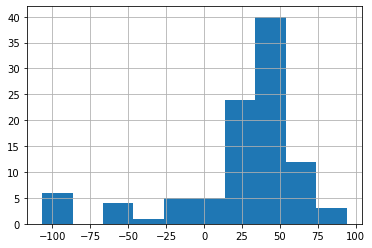

In [40]:
df2.pos_y.prod().hist()

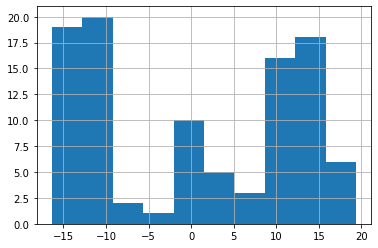

In [41]:
df2.pos_y.sum().hist()

In [42]:
ols('votes.sum() ~ pos_y.prod()', data=df2).fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            votes.sum()   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     72.42
Date:                Wed, 17 Jul 2019   Prob (F-statistic):           2.05e-13
Time:                        10:09:30   Log-Likelihood:                -547.23
No. Observations:                 100   AIC:                             1098.
Df Residuals:                      98   BIC:                             1104.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      389.4412      6.732     57.853      0.000     376.082     402.800
pos_y.prod()    -1.1842      0.139     -8.510      0.000      -1.460      -0.908
==============================================================================
Omnibus:                       25.053   Durbin-Watson:                   1.856
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.546
Skew:                          -0.392   Prob(JB):                     2.52e-37
Kurtosis:                       9.312   Cond. No.                         56.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

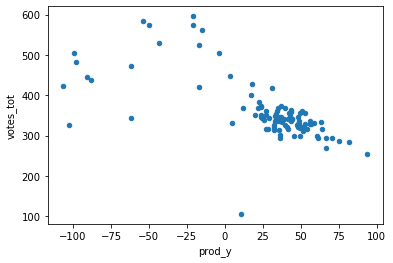

In [43]:
df3 = pd.DataFrame()
df3['prod_y'] = df2['pos_y'].prod()
df3['votes_tot'] = df2['votes'].sum()
df3.plot.scatter(x='prod_y', y='votes_tot')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 504x360 with 0 Axes>

<Figure size 504x360 with 0 Axes>

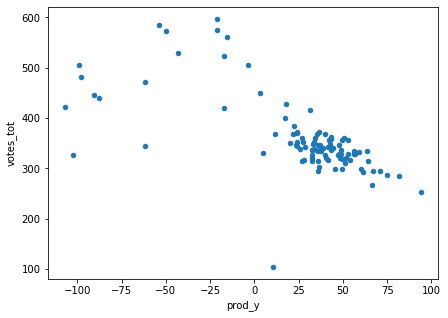

In [47]:
figure, axes = plt.subplots()
df.hist(column=['votes'],figsize=(7,5), ax=axes)
figure.savefig('plot/ex3votes.pdf')
figure.clear()
figure, axes = plt.subplots()
df.hist(column=['pos_x'],figsize=(7,5), ax=axes, range=(-11,11))
figure.savefig('plot/ex3x.pdf')
figure.clear()
figure, axes = plt.subplots()
df.hist(column=['pos_y'],figsize=(7,5), ax=axes, range=(-11,11))
figure.savefig('plot/ex3y.pdf')
figure.clear()
figure, axes = plt.subplots()
df2.votes.sum().hist(figsize=(7,5), ax=axes)
figure.savefig('plot/ex3votessum.pdf')
figure.clear()
figure, axes = plt.subplots()
df2.pos_y.prod().hist(figsize=(7,5), ax=axes)
figure.savefig('plot/ex3yprod.pdf')
figure.clear()
figure, axes = plt.subplots()
df3.plot.scatter(x='prod_y', y='votes_tot', figsize=(7,5), ax=axes)
figure.savefig('plot/ex3yvotes.pdf')